In [1]:
import pandas as pd
import numpy as np
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt

# **New Data**

In [2]:
filename = os.path.join(os.getcwd(), "data/processed", "a_courseSections_2024-08-29.csv")
courseSections_df = pd.read_csv(filename, header = 0)

filename_second = os.path.join(os.getcwd(), "data/processed", "a_scores_2024-09-11.csv")
scores_df = pd.read_csv(filename_second, header = 0)

filename_third = os.path.join(os.getcwd(), "data/processed", "a_vendorUsage_2024-09-11.csv")
vendorUsage_df = pd.read_csv(filename_third, header = 0)

filename_fourth = os.path.join(os.getcwd(), "data/processed", "a_benchmarks_2024-09-11.csv")
benchmarks_df = pd.read_csv(filename_fourth, header = 0)

filename_fifth = os.path.join(os.getcwd(), "data/processed", "a_courseSectionRosters_2024-08-29.csv")
courseSectionsRosters_df = pd.read_csv(filename_fifth, header = 0)

filename_sixth = os.path.join(os.getcwd(), "data/processed", "a_schools_2024-08-29.csv")
schools_df = pd.read_csv(filename_sixth, header = 0)

/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_95224/713448464.py:14: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  courseSectionsRosters_df = pd.read_csv(filename_fifth, header = 0)


In [3]:
courseSections_df.head(10)

,id,vanityId,year,schoolId
0,40388,PE 4,2015,222
1,40389,READING 4,2015,222
2,40390,HmroomPK6,2015,222
3,40391,LANGUAGE 4,2015,222
4,40392,SCIENCE 4,2015,222
5,40393,MATH 4,2015,222
6,40394,SOC ST 4,2015,222
7,40395,HmroomPK6,2015,222
8,40396,READING 4,2015,222
9,40397,MATH 4,2015,222


In [4]:
row = courseSections_df.loc[courseSections_df['id'] == 39975]
row

,id,vanityId,year,schoolId
8250,39975,MathGrade 4,2015,232


In [5]:
courseSections_df.shape

(17662, 4)

In [6]:
courseSections_df.schoolId.unique()

array([222, 223, 224, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236,
       237, 247, 248, 249])

In [7]:
courseSections_df.vanityId.nunique()

1047

In [8]:
courseSections_df.id.nunique()

17662

In [9]:
print(courseSections_df.isnull().sum())

id          0
vanityId    0
year        0
schoolId    0
dtype: int64


In [10]:
courseSections_df.isna().sum() > 0

id          False
vanityId    False
year        False
schoolId    False
dtype: bool

In [11]:
courseSectionsRosters_df.head(10)

,id,courseSectionId,studentId,studentLevel,ticket
0,1047696,39975,45333,4,NaN
1,1047704,39975,56116,4,NaN
2,1047706,39975,45345,4,NaN
3,1047715,39975,45400,4,NaN
4,1047729,39975,45413,4,NaN
5,1047738,39975,45429,4,NaN
6,1047740,39975,56118,4,NaN
7,1047746,39975,45438,4,NaN
8,1047751,39975,45444,4,NaN
9,1047752,39975,45445,4,NaN


In [12]:
courseSectionsRosters_df.courseSectionId.nunique()

17659

In [13]:
print(type(list(courseSectionsRosters_df.courseSectionId)))

<class 'list'>


In [14]:
print(courseSectionsRosters_df['courseSectionId'].isin(courseSections_df['id']).all())

True


Merge courseSections and courseSectionsRosters by id - all courseSectionRosters courseSectionId values are in courseSections. 

In [15]:
count = 0
id_array = []
courseSectionsIds = list(courseSections_df.id)
courseSectionRostersIds = list(courseSectionsRosters_df.courseSectionId)
for id in courseSectionsIds:
    if id in courseSectionRostersIds:
        id_array.append(id)
        print(id)
    if count == 10:
        break
    count += 1

print(len(id_array))

40388
40389
40390
40391
40392
40393
40394
40395
40396
40397
40398
11


In [16]:
scores_df.head(10)

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,44774,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44774,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44774,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44775,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44775,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,44775,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,44776,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,44776,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,44776,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,44777,6,2017,4,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


I have a dataframe called scores_df with a studentId column and a studentLevel column. How do I find how many duplicate studentId values there are in scores_df that have at least two different studentLevel data corresponding with it? So to clarify, if studentId 44 has a studentLevel value of 9 and another studentLevel value of 8, it would be counted. 

In [17]:
# Group by studentId and aggregate unique studentLevel counts
duplicate_levels = (
    scores_df.groupby('studentId')['studentLevel'].nunique()  # Count unique studentLevel values for each studentId
)

# Filter for studentIds with at least 2 different studentLevels
duplicate_student_ids = duplicate_levels[duplicate_levels >= 2]

# Count how many studentIds meet the criteria
count_of_duplicates = duplicate_student_ids.count()

print(count_of_duplicates)


57528


In [18]:
scores_df.columns

Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath',
       'value_actELAScore', 'value_mapScience', 'value_LeapELAScale',
       'value_LeapMathScale', 'value_L

In [19]:
scores_df.shape

(303750, 69)

In [20]:
scores_df.studentId.nunique()

125223

Is there a way to find which student ID belongs at which school?

In [21]:
benchmarks_df

,districtId,year,level,dataSource,value
0,45,2017,3,value_scantronMath,2356.0
1,45,2017,3,value_scantronReading,2563.0
2,45,2017,4,value_scantronMath,2493.0
3,45,2017,4,value_scantronReading,2674.0
4,45,2017,5,value_scantronMath,2584.0
5,45,2017,5,value_scantronReading,2841.0
6,45,2017,6,value_scantronMath,2675.0
7,45,2017,6,value_scantronReading,2897.0
8,45,2017,7,value_scantronMath,2766.0
9,45,2017,7,value_scantronReading,3008.0


In [22]:
testTypes = benchmarks_df.dataSource.unique()
testTypes

array(['value_scantronMath', 'value_scantronReading',
       'value_actCompositeScore', 'value_aspireReadingScaleScore',
       'value_starMath', 'value_actMathScore', 'value_actReadingScore',
       'value_actEnglishScore', 'value_actScienceScore'], dtype=object)

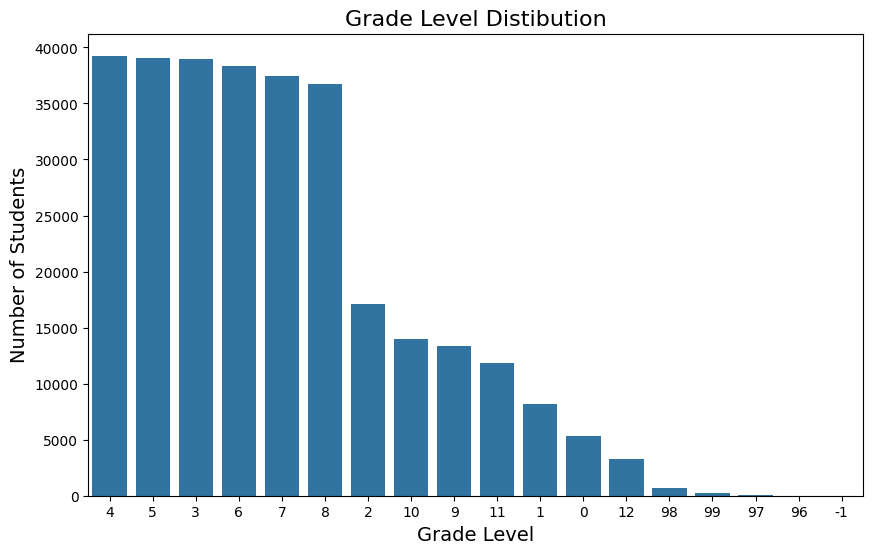

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=scores_df, x='studentLevel', order=scores_df['studentLevel'].value_counts().index)

plt.title('Grade Level Distibution', fontsize=16)
plt.xlabel('Grade Level', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

plt.show()

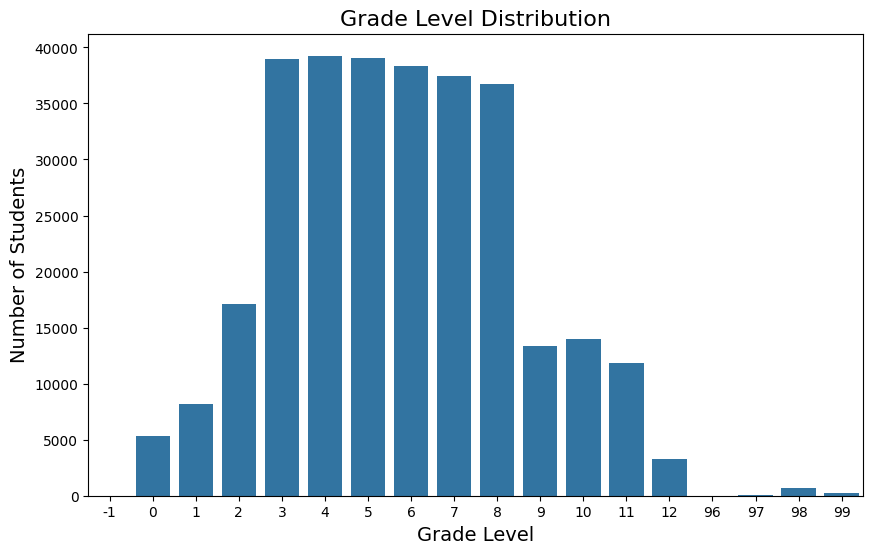

In [24]:
plt.figure(figsize=(10, 6))

# Sort the unique student levels in ascending order
order = sorted(scores_df['studentLevel'].unique())

sns.countplot(data=scores_df, x='studentLevel', order=order)

plt.title('Grade Level Distribution', fontsize=16)
plt.xlabel('Grade Level', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

plt.show()

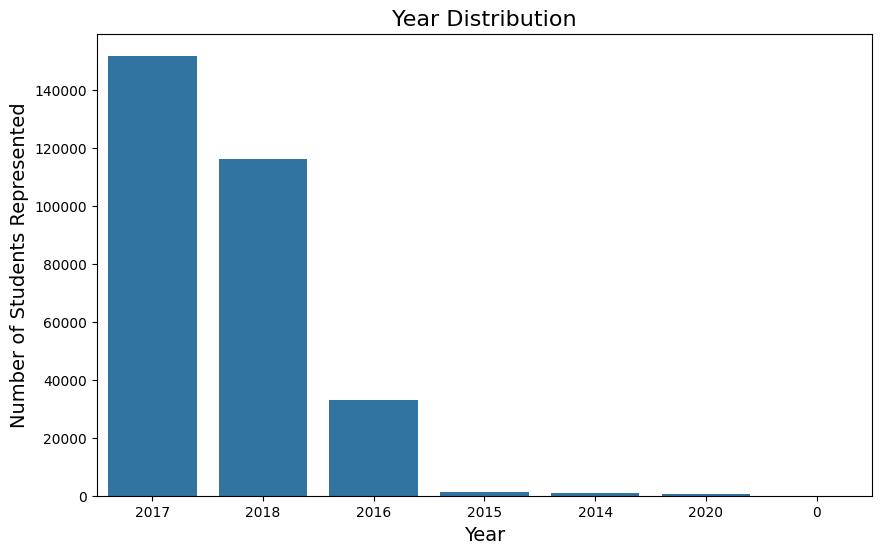

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=scores_df, x='year', order=scores_df['year'].value_counts().index)

plt.title('Year Distribution', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Students Represented', fontsize=14)

plt.show()

In [26]:
student_counts = scores_df['studentId'].value_counts()

duplicate_students = student_counts[student_counts > 1]

total_dupes = duplicate_students.count()

print("Total Duplicates: ", total_dupes)

Total Duplicates:  82751


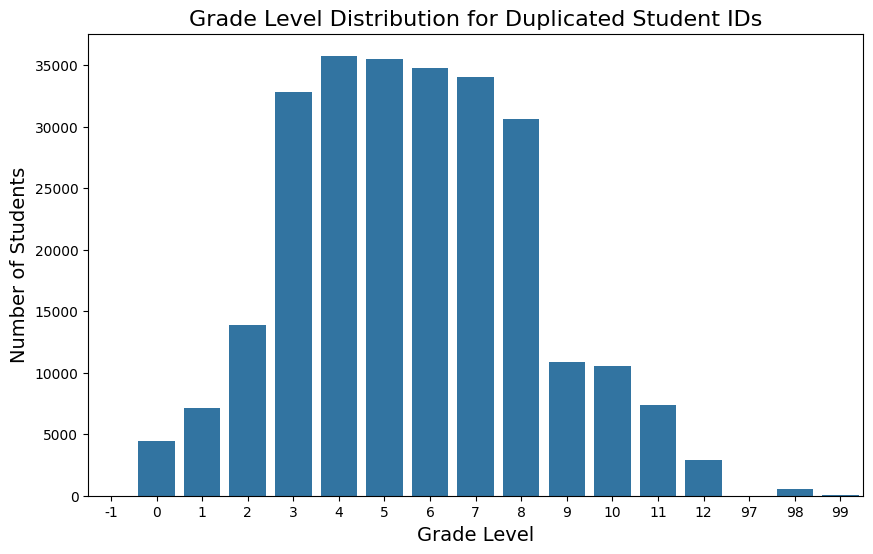

In [27]:

duplicate_student_ids = duplicate_students.index
duplicated_entries = scores_df[scores_df['studentId'].isin(duplicate_student_ids)]


plt.figure(figsize=(10, 6))
sns.countplot(data=duplicated_entries, x='studentLevel', order=sorted(duplicated_entries['studentLevel'].unique()))

plt.title('Grade Level Distribution for Duplicated Student IDs', fontsize=16)
plt.xlabel('Grade Level', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

plt.show()

In [28]:
vendorUsage_df.head(10)

,id,vendorId,studentId,active,year,usageTypeId,weeklyUsageMinutes
0,11890,72609,44777,0,2018,1,0
1,11891,72609,44783,0,2018,1,0
2,11892,72609,44784,0,2018,1,0
3,11893,72609,44807,0,2018,1,0
4,11894,72609,44809,0,2018,1,0
5,11895,72609,44810,0,2018,1,0
6,11896,72609,44811,0,2018,1,0
7,11897,72609,44812,0,2018,1,0
8,11898,72609,44813,0,2018,1,0
9,11899,72609,44814,0,2018,1,0


In [29]:
vendorUsage_df.shape

(158007, 7)

In [30]:
vendorUsage_df.usageTypeId.unique()

array([ 1,  2,  3,  5,  6,  4, 10, 11, 12,  7,  8,  9, 14])

In [31]:
vendorUsage_df.vendorId.nunique()

23

In [32]:
cleanedVendorUsage_df = vendorUsage_df[vendorUsage_df['active'] != 0]

In [33]:
schools_df.head(10)

,id,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId
0,222,Elementary A,45,5,EES,1,NaN,0
1,223,Middle School A,45,8,EMS,1,NaN,0
2,224,High School A,45,10,ECHS,1,NaN,0
3,225,Junior High B,45,12,ECJH,1,NaN,0
4,226,Elementary School B,45,18,HES,1,NaN,0
5,227,Middle School C,45,19,HMS,1,NaN,0
6,228,High School B,45,20,HHS,1,NaN,0
7,229,Middle School D,45,23,MJH,1,NaN,0
8,230,Elementary School C,45,30,RSE,1,NaN,0
9,231,Elementary School D,45,35,CES,1,NaN,0


In [34]:
benchmarks_df.head(10)

,districtId,year,level,dataSource,value
0,45,2017,3,value_scantronMath,2356.0
1,45,2017,3,value_scantronReading,2563.0
2,45,2017,4,value_scantronMath,2493.0
3,45,2017,4,value_scantronReading,2674.0
4,45,2017,5,value_scantronMath,2584.0
5,45,2017,5,value_scantronReading,2841.0
6,45,2017,6,value_scantronMath,2675.0
7,45,2017,6,value_scantronReading,2897.0
8,45,2017,7,value_scantronMath,2766.0
9,45,2017,7,value_scantronReading,3008.0


Checking connections between dataframes

In [35]:
print(courseSectionsRosters_df['studentId'].isin(scores_df['studentId']).sum())

484714


How do I create a list of which studentId values show up in scores_df, courseSectionsRosters_df, and vendorUsage_df?

In [36]:
print(scores_df['studentId'].isin(courseSectionsRosters_df['studentId']).sum())

34316


In [37]:
print(vendorUsage_df['studentId'].isin(scores_df['studentId']).all())

False


# **Merging Dataframes**

First have to make sure both dataframes have the same column name

In [38]:
copy_courseSections_df = courseSections_df.copy()
copy_courseSections_df.head()

,id,vanityId,year,schoolId
0,40388,PE 4,2015,222
1,40389,READING 4,2015,222
2,40390,HmroomPK6,2015,222
3,40391,LANGUAGE 4,2015,222
4,40392,SCIENCE 4,2015,222


In [39]:
copy_courseSections_df.rename(columns={'id': 'courseSectionId'}, inplace=True)
copy_courseSections_df.head()

,courseSectionId,vanityId,year,schoolId
0,40388,PE 4,2015,222
1,40389,READING 4,2015,222
2,40390,HmroomPK6,2015,222
3,40391,LANGUAGE 4,2015,222
4,40392,SCIENCE 4,2015,222


In [40]:
all_present = courseSectionsRosters_df['courseSectionId'].isin(copy_courseSections_df['courseSectionId']).all()
all_present

np.True_

In [41]:
merged_courseSections_df = pd.merge(courseSectionsRosters_df, copy_courseSections_df, how = 'left')
merged_courseSections_df.head()

,id,courseSectionId,studentId,studentLevel,ticket,vanityId,year,schoolId
0,1047696,39975,45333,4,NaN,MathGrade 4,2015,232
1,1047704,39975,56116,4,NaN,MathGrade 4,2015,232
2,1047706,39975,45345,4,NaN,MathGrade 4,2015,232
3,1047715,39975,45400,4,NaN,MathGrade 4,2015,232
4,1047729,39975,45413,4,NaN,MathGrade 4,2015,232


In [42]:
missing_values = merged_courseSections_df.isnull().sum()
missing_values

id                      0
courseSectionId         0
studentId               0
studentLevel            0
ticket             610343
vanityId                0
year                    0
schoolId                0
dtype: int64

In [43]:
merged_courseSections_df.drop(columns=['ticket'], inplace=True)
merged_courseSections_df.isnull().sum()

id                 0
courseSectionId    0
studentId          0
studentLevel       0
vanityId           0
year               0
schoolId           0
dtype: int64

**DFs all together (for easy reference)**

In [44]:
merged_courseSections_df.shape

(612241, 7)

In [45]:
courseSections_df.head()

,id,vanityId,year,schoolId
0,40388,PE 4,2015,222
1,40389,READING 4,2015,222
2,40390,HmroomPK6,2015,222
3,40391,LANGUAGE 4,2015,222
4,40392,SCIENCE 4,2015,222


In [46]:
courseSections_df.schoolId.unique()

array([222, 223, 224, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236,
       237, 247, 248, 249])

In [47]:
courseSectionsRosters_df.head()

,id,courseSectionId,studentId,studentLevel,ticket
0,1047696,39975,45333,4,NaN
1,1047704,39975,56116,4,NaN
2,1047706,39975,45345,4,NaN
3,1047715,39975,45400,4,NaN
4,1047729,39975,45413,4,NaN


In [48]:
scores_df.head()

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,44774,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44774,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44774,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44775,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44775,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
scores_df.columns

Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath',
       'value_actELAScore', 'value_mapScience', 'value_LeapELAScale',
       'value_LeapMathScale', 'value_L

In [50]:
all_zero_columns = scores_df.columns[(scores_df == 0).all()]
all_zero_columns

Index(['value_nweaEnglish', 'value_mapEnglish', 'value_scantronAlgebra',
       'value_eocMath', 'value_scantronGeometry', 'value_LEAPScience',
       'value_gcaInfo', 'value_gcaNar', 'value_gcaOpin', 'value_aimsWebMath',
       'value_aimsWebReading'],
      dtype='object')

In [51]:
vendorUsage_df.head()

,id,vendorId,studentId,active,year,usageTypeId,weeklyUsageMinutes
0,11890,72609,44777,0,2018,1,0
1,11891,72609,44783,0,2018,1,0
2,11892,72609,44784,0,2018,1,0
3,11893,72609,44807,0,2018,1,0
4,11894,72609,44809,0,2018,1,0


In [52]:
vendorUsage_df.vendorId.unique()

array([72609, 11333, 39195, 27172, 61673, 37017, 36130, 62382, 62509,
       62508, 37269, 25405, 52447, 52448, 61544,  7273, 63431, 63432,
       22410, 63616, 23165,  7035, 11464])

In [53]:
vendorUsage_df.usageTypeId.unique()

array([ 1,  2,  3,  5,  6,  4, 10, 11, 12,  7,  8,  9, 14])

In [54]:
vendorUsage_df.shape

(158007, 7)

In [55]:
vendorUsage_df.studentId.nunique()

44176

In [56]:
benchmarks_df.head()

,districtId,year,level,dataSource,value
0,45,2017,3,value_scantronMath,2356.0
1,45,2017,3,value_scantronReading,2563.0
2,45,2017,4,value_scantronMath,2493.0
3,45,2017,4,value_scantronReading,2674.0
4,45,2017,5,value_scantronMath,2584.0


In [57]:
benchmarks_df.dataSource.unique()

array(['value_scantronMath', 'value_scantronReading',
       'value_actCompositeScore', 'value_aspireReadingScaleScore',
       'value_starMath', 'value_actMathScore', 'value_actReadingScore',
       'value_actEnglishScore', 'value_actScienceScore'], dtype=object)